# Objective
Develop a machine learning model that can accurately classify news articles into predefined
categories. This task simulates the process of identifying various use cases of generative AI in textual data and aligns well with the focus on understanding AI deployment across different sectors.

## Timeline
Please complete the assessment in no more than 90 minutes. We know this is an open-ended project, and you could take many different approaches, some of which may be more time-consuming than others. A standardized duration helps ensure that we can fairly evaluate all candidates.


## Work Product
You may use Google Colab or publish your work to a repo. We prefer the repo to showcase your work and organizational skills, but we need you to stay within the 90-minute window.


# Dataset
Utilize one of the following datasets available on Kaggle:
- [News Category Dataset](https://www.kaggle.com/datasets/rmisra/news-category-dataset)
- [BBC News Classification Dataset](https://www.kaggle.com/c/learn-ai-bbc)


# Task Requirements


- Data Preprocessing
  - Load the dataset using pandas.
  - Handle missing values if any, and remove duplicate entries.
  - Normalize the text (convert to lowercase, remove punctuation and numbers).
  - Tokenize the text and remove stopwords.

- Feature Engineering
  - Convert the cleaned text data into numerical features using one of the following techniques:
    - TF-IDF Vectorization.
    - Countvectorizer
    - Consider experimenting with word embeddings for advanced feature extraction.

- Model Building
  - Split the dataset into training and testing sets.
  - Build at least two different models:
  - A simpler model (e.g., Logistic Regression or Naive Bayes).
  - A more complex model (e.g., Random Forest or a neural network model).
  - Train these models on the training data.

- Model Evaluation
  - Evaluate the models using metrics such as accuracy, precision, recall, and F1-score.
  - Use a confusion matrix to provide a visual understanding of the model performance.


# Deliverables

- A Jupyter notebook with implemented code, detailed comments, and visualizations.
- A comprehensive report summarizing the methodology, results, and insights. The report should discuss:
  - Steps taken in data preprocessing and feature engineering.
  - Comparison between the models used.
  - Analysis of model performance with supporting visualizations.
  - Conclusions and recommendations for model deployment.


# Evaluation Criteria
- **Correctness and Completeness**: All stages of the project (from data loading to model evaluation) should be logically and correctly implemented.
- **Model Performance and Metrics**: Selection of appropriate metrics for evaluating model performance and a thorough analysis of results.
- **Quality of Code**: The code should be clean, well-documented, and easy to understand.
- **Depth of Analysis in the Report**: The report should provide deep insights into the project, clearly communicating the steps, findings, and recommendations.

# Imports

In [1]:
# Add imports below
# python modules
import numpy as np
import pandas as pd
import string
import re
import shutil
import matplotlib.pyplot as plt 

# nlp libraries
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn.preprocessing import LabelEncoder  
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

# Tensorflow related
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses

# Data Preprocessing

In [2]:
# Load Dataset
# I am using BBC Dataset which has 5 classes. It's a supervised learning problem.
# This dataset has 1490 training and 735 test (without labels)
train_df = pd.read_csv("BBC_News_Train.csv")
test_df = pd.read_csv("BBC_New_Test.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [4]:
train_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [5]:
#are there any duplicate values
len(train_df['Text'].unique())

1440

In [6]:
len(train_df['ArticleId'].unique())

1490

In [7]:
print(train_df['Category'].unique())
print(len(train_df['Category'].unique()))

['business' 'tech' 'politics' 'sport' 'entertainment']
5


In [8]:
train_df.duplicated(subset=['Text']).any()

True

In [9]:
test_df.duplicated(subset=['Text']).any()

True

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [11]:
# there are duplicate rows in the training data
# drop the duplicates as since redundant
train_df.drop_duplicates(subset=['Text'], inplace=True)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1440 non-null   int64 
 1   Text       1440 non-null   object
 2   Category   1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 45.0+ KB


In [13]:
# Check the class (im) balance
train_df.groupby('Category').count()
# results show almost balance classes, though there is a room
# balancing could be done either by reducing some samples from classes with high samples, 
# or augmenting/increasing samples from the classes with low samples
# Another way to improve the class balance is to regularize the classes by setting a weighting in the loss function

,ArticleId,Text
Category,,
business,335,335
entertainment,263,263
politics,266,266
sport,342,342
tech,234,234


In [14]:
# Handle Missing Values

In [15]:
train_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [16]:
train_df.tail()

,ArticleId,Text,Category
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech
1489,538,santy worm makes unwelcome visit thousands of ...,tech


In [17]:
# Create new columns to store the clean text without changing the original text/label
train_df['CText'] = train_df['Text']
test_df['CText'] = test_df['Text']
train_df['Label'] = train_df['Category']

In [18]:
# Create an integral labels for the string classes
le = LabelEncoder()
train_df['Label'] = le.fit_transform(train_df['Label'])

In [19]:
# Also, store the reverse  mapping from the integral labels to the strings
l_decode = le.inverse_transform(train_df['Label'].unique())
print(l_decode)
label_encoding_map = dict(zip(train_df['Label'].unique(), l_decode))
print(label_encoding_map)

['business' 'tech' 'politics' 'sport' 'entertainment']
{0: 'business', 4: 'tech', 2: 'politics', 3: 'sport', 1: 'entertainment'}


In [20]:
train_df

,ArticleId,Text,Category,CText,Label
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...,0
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...,4
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in $168m payout eighteen former e...,0
...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,double eviction from big brother model caprice...,1
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,dj double act revamp chart show dj duo jk and ...,1
1487,1590,weak dollar hits reuters revenues at media gro...,business,weak dollar hits reuters revenues at media gro...,0
1488,1587,apple ipod family expands market apple has exp...,tech,apple ipod family expands market apple has exp...,4


In [21]:
# Normalize the text (convert to lowercase, remove punctuation and numbers)
# remove punctuation and numbers

def clean_for_punc_and_numbers(ip_text):
    remove = set(string.punctuation)
    return ''.join([c for c in ip_text if (not c.isdigit() and c not in remove)])

train_df['CText'] = train_df['CText'].apply(clean_for_punc_and_numbers)
test_df['CText'] = test_df['CText'].apply(clean_for_punc_and_numbers)

In [22]:
train_df.head()

,ArticleId,Text,Category,CText,Label
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...,4
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in m payout eighteen former enron...,0


In [23]:
# convert to the lowercase
train_df['CText'].str.lower()

0       worldcom exboss launches defence lawyers defen...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in m payout eighteen former enron...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: CText, Length: 1440, dtype: object

In [24]:
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kbaja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Tokenize and remove stopwords
stopw = stopwords.words('english')

In [26]:
# remove stop words

def clean_for_stopwords(words):
    return ' '.join(word.lower() for word in words.split() if word not in stopw)

train_df['CText'] = train_df['CText'].apply(clean_for_stopwords)
test_df['CText'] = test_df['CText'].apply(clean_for_stopwords)

In [27]:
train_df

,ArticleId,Text,Category,CText,Label
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses payout eighteen former enron dire...,0
...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,double eviction big brother model caprice holb...,1
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,dj double act revamp chart show dj duo jk joel...,1
1487,1590,weak dollar hits reuters revenues at media gro...,business,weak dollar hits reuters revenues media group ...,0
1488,1587,apple ipod family expands market apple has exp...,tech,apple ipod family expands market apple expande...,4


In [28]:
test_df

,ArticleId,Text,CText
0,1018,qpr keeper day heads for preston queens park r...,qpr keeper day heads preston queens park range...
1,1319,software watching while you work software that...,software watching work software monitor every ...
2,1138,d arcy injury adds to ireland woe gordon d arc...,arcy injury adds ireland woe gordon arcy ruled...
3,459,india s reliance family feud heats up the ongo...,india reliance family feud heats ongoing publi...
4,1020,boro suffer morrison injury blow middlesbrough...,boro suffer morrison injury blow middlesbrough...
...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,eu probe alitalia state aid european commissio...
731,373,u2 to play at grammy awards show irish rock ba...,u play grammy awards show irish rock band u pl...
732,1704,sport betting rules in spotlight a group of mp...,sport betting rules spotlight group mps peers ...
733,206,alfa romeos to get gm engines fiat is to sto...,alfa romeos get gm engines fiat stop making si...


# Classical machine learning: SVM

In [29]:
# Using TF-IDF for the vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english') 
X_train = tfidf_vectorizer.fit_transform(train_df['CText'])
y_train = train_df['Category']

In [30]:
# Initialize the SVM classifier and use linear kernel
svm_classifier = svm.SVC(kernel='linear') 

In [31]:
# Train the SVM model
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
y_pred_train = svm_classifier.predict(X_train)
print("Results on Training dataset ---")
print("Classification results:")
print(classification_report(y_train, y_pred_train))

print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

print("\nAccuracy Score:")
print(accuracy_score(y_train, y_pred_train))

Results on Training dataset ---
Classification results:
               precision    recall  f1-score   support

     business       1.00      1.00      1.00       335
entertainment       1.00      1.00      1.00       263
     politics       1.00      1.00      1.00       266
        sport       1.00      1.00      1.00       342
         tech       1.00      1.00      1.00       234

     accuracy                           1.00      1440
    macro avg       1.00      1.00      1.00      1440
 weighted avg       1.00      1.00      1.00      1440


Confusion Matrix:
[[335   0   0   0   0]
 [  0 263   0   0   0]
 [  0   0 266   0   0]
 [  1   0   0 341   0]
 [  0   1   0   0 233]]

Accuracy Score:
0.9986111111111111


# Neural network based 

# Feature Engineering / Data Pipeline

In [33]:
# Convert data into numerical features
# Convert the cleaned text data into numerical features using one of the following techniques:
#  ○ TF-IDF Vectorization.
#  ○ Countvectorizer
#  ○ Consider experimenting with word embeddings for advanced feature extraction

In [34]:
# I am using word embedding from Tensorflow

In [35]:
# split the train data to training, valuation, and test
all_train_ds = tf.data.Dataset.from_tensor_slices((train_df['CText'], train_df['Label']))
all_train_ds = all_train_ds.shuffle(buffer_size=1000)
# Total train dataset is 1440
data_size = 1440
train_size = int(data_size * 0.7)
val_size = int(data_size * 0.15)
train_ds = all_train_ds.take(train_size)
remaining = all_train_ds.skip(train_size)
val_ds = remaining.take(val_size)
test_ds = remaining.skip(val_size)

In [36]:
# print train_ds
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [37]:
# print the first two train_ds
for text_bt, label_bt in train_ds.take(2):
    print("Text", text_bt)
    print("label", label_bt)

Text tf.Tensor(b'labour four little words labour unveiled four little words form heart general election campaign returned planet galifray looming slogan britain forward back instruction one interplanetary time lords become much part daily lives sky always mostly stop noticing word britain cast red background nod old labour forward italics cunningly slopes forward along back set mushy pea green background one journalists assembled unveiling declared post modern something great use colour ad men really earn money coincidentally ad men came abandoned flying pigs socalled fagin posters caused tory protests sacked election supremo alan milburn declared good job mr milburn latest series preelectioncampaign campaigning explained slogan reaction polling suggests public believe labour tony blair future michael howard tories would take country backwards many people talk years good old days declared would aggressive campaign things would inevitably boil choice labour tories nobody claimed could p

In [38]:
# function to standardise
# Note, there is a repeat ops for lowering and removing the punctuation; 
# It was also done with the panda above; Only one is needed, though 
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  return tf.strings.regex_replace(lowercase, '[%s]' % re.escape(string.punctuation), '')

In [39]:
# Use TextVectorization layer to convert sentences to vectors
#max vocab size
vocab_size = 10000
#max size of words/tokens in a sentenct
sentence_length = 120

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sentence_length)

In [40]:
# Make a text-only dataset (without labels), then call adapt
# adapt gets the vocabulary from the tokens in the dataset
train_text = all_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [41]:
# function to vectorize the string text and create one-hot for the labels. 
# One hot is needed to for the softmax output layer of the network
def vectorize_text(text, label):
  return vectorize_layer(text), tf.one_hot(label, 5)

In [42]:
# check the data
for text_bt, label_bt in train_ds.take(4):
    print("Text", text_bt)
    print("label", label_bt)

Text tf.Tensor(b'asian banks halt dollar slide dollar regained lost ground major currencies wednesday south korea japan denied planning selloff dollar suffered biggest oneday fall four months tuesday fears asian central banks lower reserves dollars japan biggest holder dollar reserves world south korea fourth largest dollar buying yen gmt stronger day also edged higher euro pound one euro worth one pound buying concerns rising oil prices outlook dollar pushed us stock markets tuesday dow jones industrial average closed nasdaq lost dollar latest slide began south korean parliamentary report suggested country bn foreign reserves plans boost holdings currencies australian canadian dollar wednesday however south korea moved steady financial markets issued statement bank korea change portfolio currencies reserves due short term market factors japan steadied nerves senior japanese finance ministry official told reuters plans change composition currency holdings foreign reserves thinking expa

In [43]:
# check the data from the dataset
first_text, first_label = next(iter(train_ds))
print("Review", first_text)
print("Label", first_label)
print("Vectorized review", vectorize_text(first_text, first_label))

Review tf.Tensor(b'indecency fine viacom media giant viacom paid \xc2\xa3m end investigations indecency us radio tv shows settlement federal communications commission fcc ends longrunning saga dating back fcc looking shows including shock jock howard stern two new york djs stern recently announced leaving viacom two djs sacked show featured couple purporting sex church church incident two years ago viacom agreed install audio delay equipment radio stations broadcast live programming also agreed train broadcasters employees indecency laws agreement cancels investigations radio television shows said richard diamond fcc deputy secretary communications shows broadcast viacomowned stations across united states viacom five days pay fine according agreement payment related fcc \xc2\xa3 fine levied viacom exposure singer janet jackson breast cbs super bowl halftime show january viacom contesting fine first time viacom paid indecency charges infinity broadcasting owned viacom paid cumulative fi

In [44]:
# let's look at the vocab mapping
vectorize_layer.get_vocabulary()[2123]

'driscoll'

In [45]:
# total len of the vocab
len(vectorize_layer.get_vocabulary())

10000

In [46]:
# Apply vectorization on the train, val, and test datasets
train_ds = train_ds.map(vectorize_text)
val_ds = val_ds.map(vectorize_text)
test_ds = test_ds.map(vectorize_text)

In [47]:
# Create batches of train, val, and test
# The datapipeline which goes to the network
AUTOTUNE = tf.data.AUTOTUNE

batch_size = 4
buffer_size = 124

#shuffle the training data only for a faster convergence
# no need to shuffle the val and test data
train_ds = train_ds.shuffle(buffer_size).batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)

In [48]:
# check the data after batching
for t, l in train_ds.take(1):
    print(t)
    print(l)

tf.Tensor(
[[2123  294   26  149  954 1330 2123  965  420 3693  106  196 2009  294
  2123 1821  722 1007 2168  439 1817 3075  354 1244   49  526 1529  722
   879  375 1503 1224  394  591 4941    5 1667 3075  354 5397 2718  560
   375   76   65 1879 6149    4 1984 1529  394 3004 4194   11    5  872
  2018 2084 2018 3288 8122   11    5  481 1332  829  294    1 2036  296
   149  170 1454 2652 2596 2298 3998 3021 5261 8924 3998  412  135 1949
   227  735  406  219  511   12  387 2228 4194    1 4941 3375 1320 3872
  6354 3256 3763  932 3424 3590 3998 5703 6006 6232 2521 3192  404 3590
  4476 4528    0    0    0    0    0    0]
 [1886 2754   11 8030  140   95  146  522 8715    1 5047 1305 1373   42
   514    7    1  155   36  208  146   71   24  136 5724 1130   65 2239
    24    5    1 1050 8020  156   11  573 5791  458   96 1433   27  307
     1  417  284 1006 1106  380   55    1  136   79 1635 1700  308   27
   181 1815    1 7000 1130    1  284  136  401  231  378   29  188   85
  1006 127

In [49]:
# check the data after batching
for text_bt, label_bt in train_ds.take(1):
    for i in range(batch_size):
        print("Text", text_bt[i])
        print("label", label_bt[i])

Text tf.Tensor(
[  21  851 5088    1   86 6693    1 9406 9005    1 1867  153   21 5088
 4287  978   82  115 9406  115  470  366    2  536 2611 1338  691  218
 5241    1 6014  621 3162 4287 2300   16    2 2611 1142   21    1    1
  233  553    1    1    1 2611 5926 1230    1 2210  198   80    1 2210
    1 5623    1    1  512    2    3  366  621    1 1126 2667 1867   89
 1848  765 2113    1 8190 5222  544    1  476 2300    1 1501   27    1
 1639 2827  456    1    3  366    2  524  272    1  711  122   15 1323
    1    1 3162   21  687  415 9406  332  272  173    2 1268  597 1622
 1374 1484 9406    7   13 5088 4287   21], shape=(120,), dtype=int64)
label tf.Tensor([0. 1. 0. 0. 0.], shape=(5,), dtype=float32)
Text tf.Tensor(
[1178 2041 2935 3637 3267 1178 1603  357 2935 9902 1924 3198 3637 7052
   59   11 5269  482  240 3637  152  326  681  402   82 1559 7448  174
  283  312  268 1178    2   72    4   41   10 2923   10   26  179  330
   62   71   24  904 1265 1178 2588 1894 2935  215 2666 

In [50]:
# check the data after batching
first_text, first_label = next(iter(train_ds))
print("text:", first_text)
print("label:", first_label)

text: tf.Tensor(
[[6478 4934 1540 6478  329 9804  142   52  529  222  967 4347   40 1542
   104  804   12  461   48 2155   69   48    9  264  967 1612   48 2155
  6478 1302  118  489 1685  189 4273  668  226  119 3388  373 6478    2
   425  218 1620  228  301 1411  283  616  281 2507    2    1    1  850
     1  803 3216  870 6680   57   43   88    1   93  528   48 2155   10
   358 3951 6478  164 4630  880    2 1755  129  868 6102 1166 1970   23
   284    2 9673    1  541 6478  789 2102  329 3687  280    1    1    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [ 383 3262  163  145  229  383  413 1486  860  229  163    1  272   14
     1 5173 2629    1  562 1186 2629 1954 1231    1  625  364  379 7639
  7179  145 7179    1 7639    1 1870 2400 1231  379  625    7 2681 5948
  3714 5173  727    1 3696  625   17  448  145  933    7    1 5662  109
   562   22   34   88  348   82  373 2336   44 2629   41  121 1448  314
  51

# Model Building

### Simple model: build and train

In [51]:
# Simple model  (e.g., Logistic Regression or Naive Bayes).
# For the simple model, I have used a logistic regression equivalent NN, with the embedding layer

# I am using an embedding of 16 # could be a hyper-parameter
embedding_dim = 8
simple_model = tf.keras.Sequential([
  layers.InputLayer(shape=(sentence_length,)),
  layers.Embedding(vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(units = 5, activation='softmax'),
])

# model summary
simple_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 120, 8)         │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 8)              │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,045 (312.68 KB)

 Trainable params: 80,045 (312.68 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Let's compile the keras Sequential model
# For the multiclass problem, CategoricalCrossengropy loss is used
lr = 0.001
simple_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

In [53]:
# Code to plot the model summary visually
#model.build()
#tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, 
                          #show_layer_names=True, rankdir='TB', show_layer_activations=True, \
                          #expand_nested=True, dpi=80)

In [54]:
# Let's train the network now
epochs = 30
sm_history = simple_model.fit( train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4325 - loss: 1.5912 - val_accuracy: 0.7407 - val_loss: 1.4866
Epoch 2/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7050 - loss: 1.4500 - val_accuracy: 0.8935 - val_loss: 1.2631
Epoch 3/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8605 - loss: 1.2188 - val_accuracy: 0.9491 - val_loss: 1.0032
Epoch 4/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9266 - loss: 0.9581 - val_accuracy: 0.9769 - val_loss: 0.7603
Epoch 5/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9642 - loss: 0.7243 - val_accuracy: 0.9907 - val_loss: 0.5682
Epoch 6/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9793 - loss: 0.5435 - val_accuracy: 0.9907 - val_loss: 0.4275
Epoch 7/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9857 - loss: 0.4113 - val_accuracy: 0.9954 - val_loss: 0.3264
Epoch 8/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9933 - loss: 0.3150 - val_accuracy: 0.

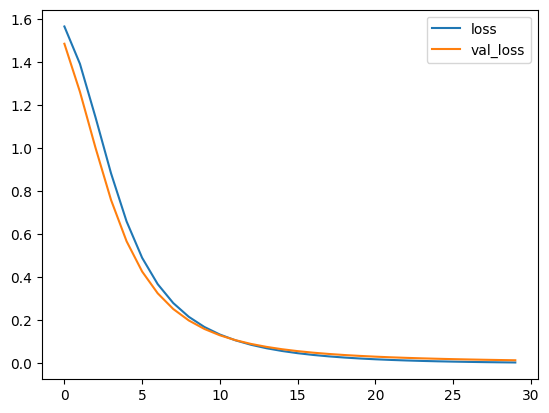

In [55]:
plt.plot(sm_history.history['loss'],label='loss')
plt.plot(sm_history.history['val_loss'],label='val_loss')
plt.legend()

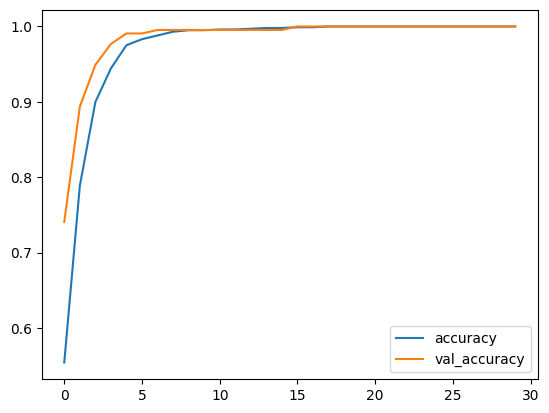

In [56]:
plt.plot(sm_history.history['accuracy'],label='accuracy')
plt.plot(sm_history.history['val_accuracy'],label='val_accuracy')
plt.legend()

### Complex model: build and train

In [57]:
# Complex model (e.g., Random Forest or a neural network model).
embedding_dim = 32
complex_model = tf.keras.Sequential([
  layers.InputLayer(shape=(sentence_length,)),
  layers.Embedding(vocab_size, embedding_dim),
  layers.SpatialDropout1D(0.7),
  layers.Bidirectional(layers.LSTM(32, recurrent_dropout=0.7, return_sequences=True)),
  layers.Bidirectional(layers.LSTM(16)),
  layers.Dense(units = 5, activation='softmax'),
])

# model summary
complex_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 120, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 120, 32)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 120, 64)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,173 (1.32 MB)

 Trainable params: 347,173 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Let's compile the keras Sequential model
# For the multiclass problem, CategoricalCrossengropy loss is used
lr = 0.001
complex_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

In [59]:
# Train model
epochs = 10
cm_history = complex_model.fit( train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - accuracy: 0.2644 - loss: 1.5889 - val_accuracy: 0.5417 - val_loss: 1.3548
Epoch 2/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.4257 - loss: 1.2911 - val_accuracy: 0.7454 - val_loss: 0.8336
Epoch 3/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.6380 - loss: 0.9423 - val_accuracy: 0.9213 - val_loss: 0.4211
Epoch 4/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.7804 - loss: 0.5694 - val_accuracy: 0.9259 - val_loss: 0.2668
Epoch 5/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8556 - loss: 0.4186 - val_accuracy: 0.9907 - val_loss: 0.1251
Epoch 6/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9169 - loss: 0.2843 - val_accuracy: 0.9907 - val_loss: 0.0839
Epoch 7/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.9512 - loss: 0.1808 - val_accuracy: 0.9907 - val_loss: 0.0842
Epoch 8/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.9495 - loss: 0.1833 - 

In [60]:
# Let's monitor the loss curve of the training

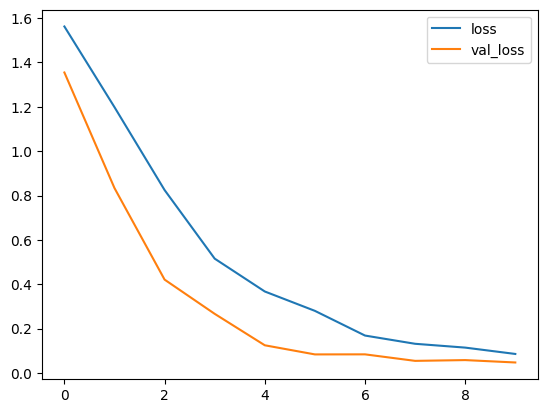

In [61]:
plt.plot(cm_history.history['loss'],label='loss')
plt.plot(cm_history.history['val_loss'],label='val_loss')
plt.legend()

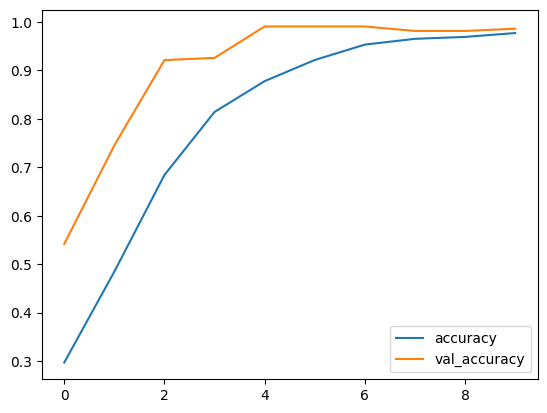

In [62]:
plt.plot(cm_history.history['accuracy'],label='accuracy')
plt.plot(cm_history.history['val_accuracy'],label='val_accuracy')
plt.legend()

# Model Evaluation

In [63]:
# function to get actual and predicted labels from the tf.data.Dataset
def get_actual_predicted_labels(model, dataset): 
  actual = [labels for _, labels in dataset.unbatch()]
  predicted = model.predict(dataset)

  actual = tf.stack(actual, axis=0)
  actual = tf.argmax(actual, axis=1)
  predicted = tf.concat(predicted, axis=0)
  predicted = tf.argmax(predicted, axis=1)

  return actual, predicted

### simple model evaluation

In [64]:
# Evaluate Models using accuracy, precision, recall, and F1-score metrics.

In [65]:
# Let's see the model accuracy on the test_ds
loss, accuracy = simple_model.evaluate(test_ds)
print("Accuracy: ", accuracy)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9920 - loss: 0.0280
Accuracy:  0.9953917264938354


In [66]:
#precision, recall, fbeta, support
actual, predicted = get_actual_predicted_labels(simple_model, test_ds)
precision, recall, f1score, s = metrics.precision_recall_fscore_support(actual, predicted)
print("Precision", precision)
print("Recall:", recall)
print("F1-score:", f1score)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Precision [0.98148148 1.         1.         1.         1.        ]
Recall: [1.    1.    0.975 1.    1.   ]
F1-score: [0.99065421 1.         0.98734177 1.         1.        ]


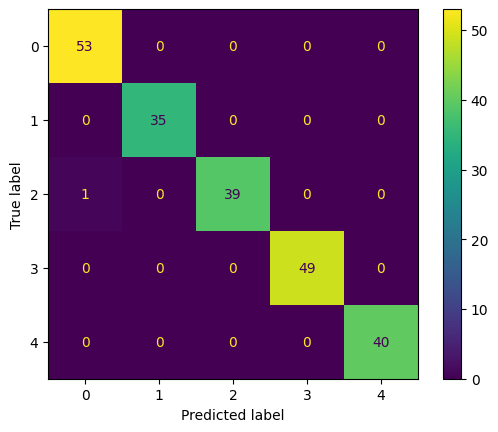

In [67]:
confusion_metrics = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_metrics, display_labels=[0,1,2,3,4])
cm_display.plot()
plt.show()

### complex model evaluation

In [68]:
# Let's see the model accuracy on the test_ds
loss, accuracy = complex_model.evaluate(test_ds)
print("Accuracy: ", accuracy)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9519 - loss: 0.1458
Accuracy:  0.9677419066429138


In [69]:
#precision, recall, fbeta, support
actual, predicted = get_actual_predicted_labels(complex_model, test_ds)
precision, recall, f1score, s = metrics.precision_recall_fscore_support(actual, predicted)
print("Precision", precision)
print("Recall:", recall)
print("F1-score:", f1score)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
Precision [0.96363636 1.         0.97222222 0.94230769 0.975     ]
Recall: [1.         0.97142857 0.875      1.         0.975     ]
F1-score: [0.98148148 0.98550725 0.92105263 0.97029703 0.975     ]


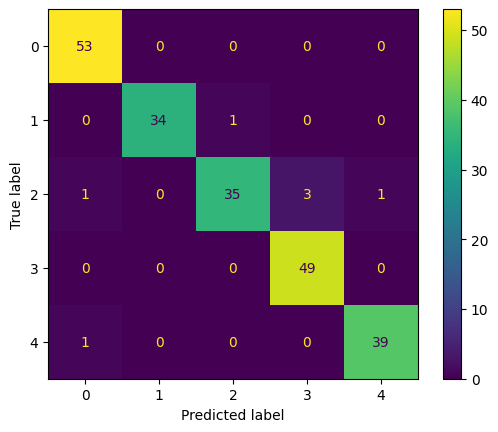

In [70]:
confusion_metrics = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_metrics, display_labels=[0,1,2,3,4])
cm_display.plot()
plt.show()

# Overall summary

The training data is too small (1440) to make a general statement
SVM gives reasonable accuracy on all the training data
Even a simple NN model gives reasonable accuracy on the held out test data
A complex NN model with BiDirectional LSTMs doesn't give any better accuracy than the simple NN model

# Future Improvements

We can try transformers for the interpretable results with self attention <br>
Also, we can directly try LLMs with prompt-engineering with Few shot / 1-shot learning <br>

Use the given test set to run the prediction


# Backup

In [71]:
# extend the model to take text input for inference instead of vectorized;
# Just stack up the vectorize_layer and compile this
export_model = tf.keras.Sequential([
  vectorize_layer,
  simple_model,
])

export_model.compile(
    loss=losses.CategoricalCrossentropy(), optimizer="adam", metrics=['accuracy']
)

In [72]:
# model summary of the export_model
export_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ ?                      │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ ?                      │        80,045 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,045 (312.68 KB)

 Trainable params: 80,045 (312.68 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Code to visualize model
#export_model.build()
#tf.keras.utils.plot_model(export_model, show_shapes=True, show_dtype=True, 
                          #show_layer_names=True, rankdir='TB', show_layer_activations=True, \
                          #expand_nested=True, dpi=80)

In [74]:
raw_val_ds = tf.data.Dataset.from_tensor_slices((train_df['CText'], train_df['Label']))
raw_val_ds = raw_val_ds.shuffle(buffer_size=1000)
raw_val_ds = raw_val_ds.skip(1000)

In [75]:
raw_val_ds = raw_val_ds.batch(batch_size=batch_size)

In [76]:
for t,l in raw_val_ds.take(1):
    print(t)
    print(l)

tf.Tensor(
[b'spike lee backs student directors filmmaker spike lee says black representation stronger ever cinema tv true power entertainment lies behind camera hate director urged students old atlanta university morehouse college seek gatekeeper positions behind scenes lee told work corporate ladder everybody actor everybody make record spoke part discussion panel led retrospective films returning old university educates african american students lee discussed challenges facing black people entertainment industry even denzel washington getting movie comes time movie go one gatekeepers lee said told aspiring young filmmakers audience ignore nontraditional routes getting movie made including raising funds independently releasing films straight dvd huge market yearold director said something looked upon stepchild lee made films including jungle fever right thing summer sam hit gotta'
 b'mp shock long lost daughter labour mp stephen pound told shock joy learning fathered daughter control

In [77]:
first_text, first_label = next(iter(raw_val_ds))
print("Review", first_text)
print("Label", first_label)
#print("Vectorized review", vectorize_text(first_text, first_label))

Review tf.Tensor(
[b'dallaglio eyeing lions tour place former england captain lawrence dallaglio still harbours hopes place british irish lions tour new zealand lions coach sir clive woodward made clear pick squad tour next summer based form shown six nations championship dallaglio called time england earlier year said assure let anyone know takes offer told daily telegraph dallaglio toured south africa lions forced home early knee injury trip australia three years ago yearold also felt concentrating club rugby could prolonged international shelflife said good shape fresh without another tests clock witnessed close quarters sunday heineken cup match leicester certainly feel place alongside players many trip fit playing well certainly available clive feels need look outside international crop fine need look far'
 b'x factor show gets second series tv talent show x factor return second series recommissioned itv judges simon cowell louis walsh sharon osbourne discussions sign new series f

In [78]:
#one hot for the raw_val_ds
def one_hot_label(text, label):
  return text, tf.one_hot(label, 5)

raw_val_ds=raw_val_ds.map(one_hot_label)

In [79]:
first_text, first_label = next(iter(raw_val_ds))
print("Review", first_text)
print("Label", first_label)

Review tf.Tensor(
[b'china role yukos splitup china lent russia bn \xc2\xa3bn help russian government renationalise key yuganskneftegas unit oil group yukos revealed kremlin said tuesday bn russian state bank veb lent stateowned rosneft help buy yugansk turn came chinese banks revelation came russian government said rosneft signed longterm oil supply deal china deal sees rosneft receive bn credits china cnpc according russian newspaper vedomosti credits would used pay loans rosneft received finance purchase yugansk reports said cnpc offered yugansk return providing finance company opted longterm oil supply deal instead analysts said one factor might influenced chinese decision possibility litigation yukos yugansk former owner cnpc become shareholder rosneft veb declined comment two companies rosneft cnpc agreed prepayment longterm deliveries said russian oil official sergei oganesyan nothing unusual prepayment five six years announcements help explain rosneft mediumsized indebted relat

In [80]:
first_text, first_label = next(iter(raw_val_ds))
print("Review", first_text)
print("Label", first_label)

Review tf.Tensor(
[b'google toolbar sparks concern search engine firm google released trial tool concerning net users directs people preselected commercial websites autolink feature comes google latest toolbar provides links webpage amazoncom finds book isbn number site also links google map service address car firm carfax licence plate google said feature available us adds useful links users concerned google dominant position search engine market place could mean would giving competitive edge firms like amazon autolink works creating link website based information contained webpage even link specified whether publisher page given permission user clicks autolink feature google toolbar webpage book unique isbn number would link directly amazon website could mean online libraries list isbn book numbers find directing users amazoncom whether like websites paid advertising pages may also directing people rival services dan gillmor founder grassroots media supports citizenbased media said t

In [81]:
# Test it with `raw_test_ds`, which yields raw strings
export_model.evaluate(raw_val_ds)

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9916 - loss: 0.0000e+00


[0.0, 0.0, 0.9954545497894287, 0.9954545497894287]

In [82]:
# Confusion matrix  to provide a visual understanding of the model performance.

In [83]:
examples = tf.constant(["this is bbc news",
                        "There is an election today",
                        ])

In [84]:
np.argmax(export_model.predict(examples), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


array([3, 3], dtype=int64)

In [85]:
given_test_ds = tf.data.Dataset.from_tensor_slices((test_df['CText']))